<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_da/da13_concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# pandas.Series의 concat

In [3]:
s1 = pd.Series(data=[1, 2], index=['a', 'b'])
s1

a    1
b    2
dtype: int64

In [4]:
s2 = pd.Series(data=[3, 4, 5], index=['c', 'd', 'e'])
s2

c    3
d    4
e    5
dtype: int64

In [5]:
result = pd.concat([s1, s2], axis=0)  # axis의 기본값은 0이기 때문에 생략 가능.
result  #> Series

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [6]:
result = pd.concat([s1, s2], axis=1)
result  #> DataFrame

,0,1
a,1.0,NaN
b,2.0,NaN
c,NaN,3.0
d,NaN,4.0
e,NaN,5.0


In [7]:
s1

a    1
b    2
dtype: int64

In [8]:
s2 = pd.Series(data=[3, 4, 5], index=['a', 'b', 'c'])
s2

a    3
b    4
c    5
dtype: int64

In [9]:
pd.concat([s1, s2], axis=0)

a    1
b    2
a    3
b    4
c    5
dtype: int64

In [10]:
pd.concat([s1, s2], axis=1)

,0,1
a,1.0,3
b,2.0,4
c,NaN,5


# pandas.DataFrame의 concat

In [11]:
df1 = pd.DataFrame(data=np.arange(6).reshape((3, 2)),
                   index=['a', 'b', 'c'],
                   columns=['data1', 'data2'])
df1

,data1,data2
a,0,1
b,2,3
c,4,5


In [13]:
df2 = pd.DataFrame(data=np.arange(4).reshape((2, 2)),
                   index=['a', 'c'],
                   columns=['data2', 'data3'])
df2

,data2,data3
a,0,1
c,2,3


In [14]:
pd.concat([df1, df2], axis=0)

,data1,data2,data3
a,0.0,1,NaN
b,2.0,3,NaN
c,4.0,5,NaN
a,NaN,0,1.0
c,NaN,2,3.0


In [15]:
pd.concat([df1, df2], axis=1)

,data1,data2,data2,data3
a,0,1,0.0,1.0
b,2,3,NaN,NaN
c,4,5,2.0,3.0


https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames 폴더에는 yob1880.txt ~ yob2010.txt 파일들이 있음. 파일에는 연도의 신생아 이름, 성별, 인구수가 기록되어 있음.

1. 텍스트 파일을 하나씩 읽어서 데이터 프레임을 생성
2. 각 데이터 프레임에 year 컬럼을 추가
3. 131개의 데이터 프레임을 하나의 데이터 프레임으로 병합(concat)

In [19]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob2010.txt'
df = pd.read_csv(file_path, header=None, names=['name', 'gender', 'count'])
df['year'] = 2010
df.head()

,name,gender,count,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


In [21]:
years = range(1880, 2011)  # 연도
col_names = ['name', 'gender', 'count']  # 데이터 프레임의 컬럼 이름들
yobs = []  # 파일을 하나씩 읽어서 데이터 프레임을 생성할 때마다, 생성된 데이터 프레임을 append

for y in years:
    # 파일 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{y}.txt'
    # 데이터 프레임 생성
    df = pd.read_csv(file_path, header=None, names=col_names)
    # 데이터 프레임에 파생변수 추가
    df['year'] = y
    # 완성된 데이터 프레임을 리스트에 추가
    yobs.append(df)

print(len(yobs))

131


In [34]:
yob_df = pd.concat(yobs, axis=0, ignore_index=True)

In [35]:
yob_df.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [36]:
yob_df.tail()

,name,gender,count,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [37]:
yob_df.shape

(1690784, 4)

In [38]:
yob_df.loc[0]

name      Mary
gender       F
count     7065
year      1880
Name: 0, dtype: object

In [39]:
import matplotlib.pyplot as plt

In [46]:
# 연도별 신생아 숫자 시각화
# 연도별 부분집합에서 count 컬럼의 값의 합계(sum)들의 리스트
births_by_year = [yob_df[yob_df['year'] == y]['count'].sum() for y in years]

# births_by_year = []
# for y in years:
#     sub_df = yob_df[yob_df['year'] == y]
#     births = sub_df['count'].sum()
#     births_by_year.append(births)

s = pd.Series(data=births_by_year, index=years)
s

1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Length: 131, dtype: int64

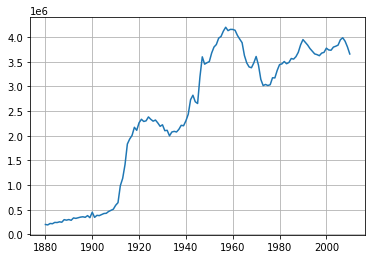

In [48]:
plt.plot(s.index, s.values)
plt.grid()
plt.show()

In [49]:
import seaborn as sns

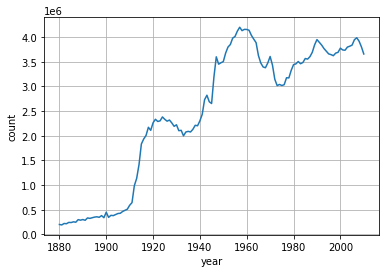

In [50]:
sns.lineplot(data=yob_df, x='year', y='count', estimator='sum', err_style=None)
plt.grid()
plt.show()

In [51]:
# 연도별 성별 신생아 숫자 시각화
male_births = [yob_df[(yob_df['gender'] == 'M') & (yob_df['year'] == y)]['count'].sum()
               for y in years]
female_births = [yob_df[(yob_df['gender'] == 'F') & (yob_df['year'] == y)]['count'].sum()
                 for y in years]

s1 = pd.Series(data=male_births, index=years)
s2 = pd.Series(data=female_births, index=years)

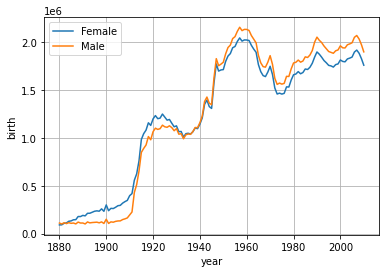

In [58]:
plt.plot(s2.index, s2.values, label='Female')
plt.plot(s1.index, s1.values, label='Male')

plt.legend()
plt.xlabel('year')
plt.ylabel('birth')
plt.grid()
plt.show()

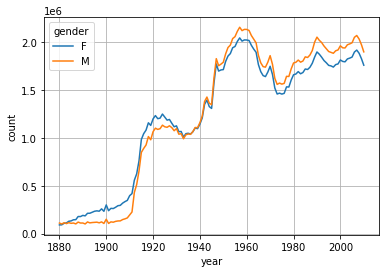

In [57]:
sns.lineplot(data=yob_df, x='year', y='count', hue='gender',
             estimator='sum', err_style=None)
plt.grid()
plt.show()